In [42]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
data = pd.read_csv('IRIS.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# EDA

In [44]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [45]:
print(f'Shape of the dataframe: {data.shape}\n')
print(f'Null values in the dataset: \n{data.isna().sum()}\n')

# Mode of Target Variable
print(f'Mode of Target Variable: \n{data['species'].mode()}')

# Mean of each attribute 
print(f'\nMean Value of Sepal_Length: {np.mean(data['sepal_length'])}')
print(f'\nMean Value of Sepal_Length: {np.mean(data['sepal_width'])}')
print(f'\nMean Value of Sepal_Length: {np.mean(data['petal_length'])}')
print(f'\nMean Value of Sepal_Length: {np.mean(data['petal_width'])}')

Shape of the dataframe: (150, 5)

Null values in the dataset: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Mode of Target Variable: 
0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: species, dtype: object

Mean Value of Sepal_Length: 5.843333333333334

Mean Value of Sepal_Length: 3.0540000000000003

Mean Value of Sepal_Length: 3.758666666666666

Mean Value of Sepal_Length: 1.1986666666666668


In [46]:
# Label Encoding the Target Variable
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
print(f' Range of Sepal Length: {min(data['sepal_length']),max(data['sepal_length'])}')
print(f' Range of Sepal Length: {min(data['sepal_width']),max(data['sepal_width'])}')
print(f' Range of Sepal Length: {min(data['petal_length']),max(data['petal_length'])}')
print(f' Range of Sepal Length: {min(data['petal_width']),max(data['petal_width'])}')

 Range of Sepal Length: (4.3, 7.9)
 Range of Sepal Length: (2.0, 4.4)
 Range of Sepal Length: (1.0, 6.9)
 Range of Sepal Length: (0.1, 2.5)


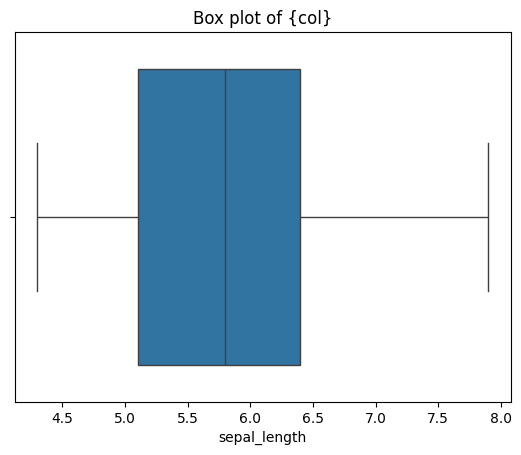

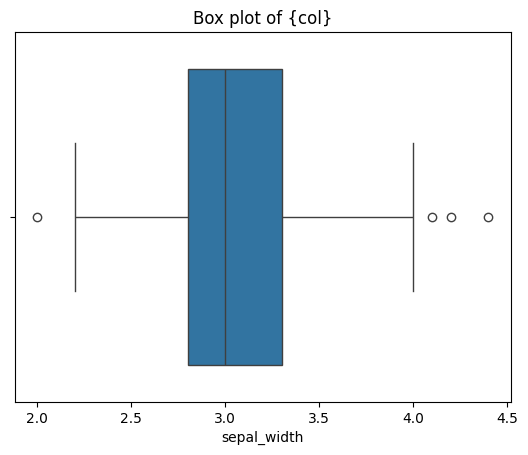

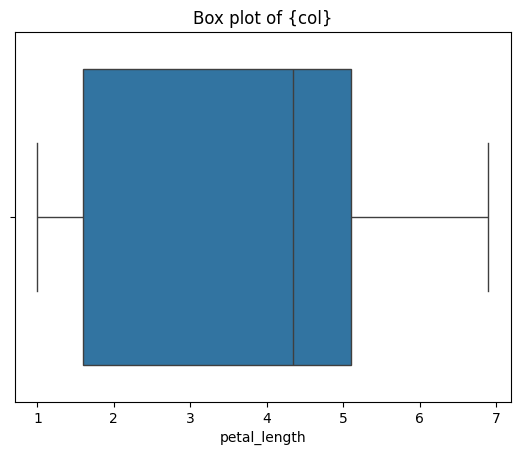

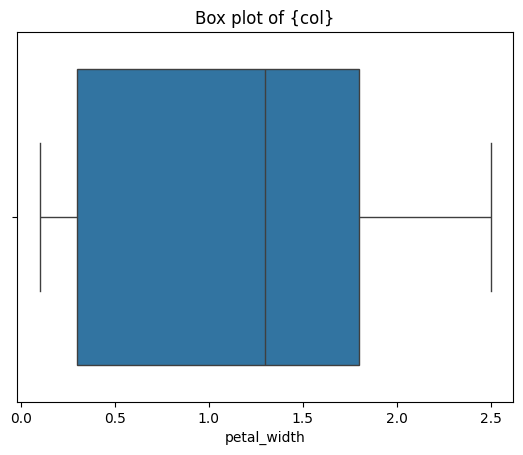

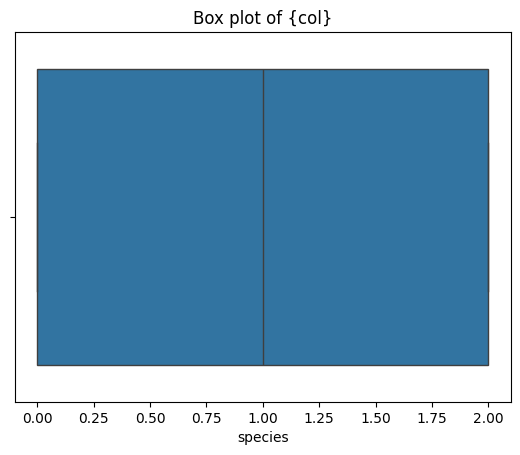

In [49]:
# Box plot for the data
for col in data.columns:
    sns.boxplot(x= data[col])
    plt.title('Box plot of {col}')
    plt.show()

Text(0.5, 1.0, 'Correlation plot for the attributes of the IRIS dataset')

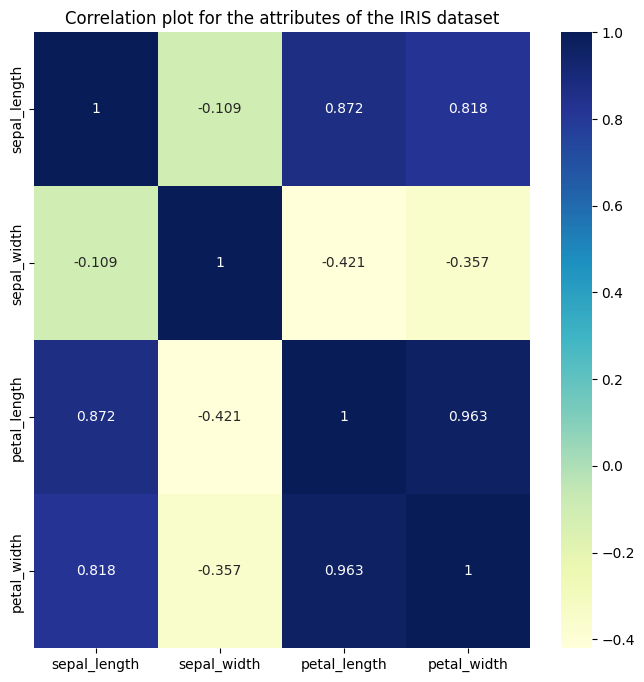

In [50]:
#correlaion heatmap
plt.figure(figsize=(8,8)) 
sns.heatmap(data.iloc[:,:-1].corr(),annot = True, fmt='.3g',cmap='YlGnBu')
plt.title('Correlation plot for the attributes of the IRIS dataset')

In [51]:
# train-test split of the dataset
target= data['species']
attributes=data.drop(['species'],axis=1)

In [52]:
from sklearn.model_selection import train_test_split, learning_curve
x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size=0.2, random_state = 100)

In [53]:
# Builiding ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

**1) Logistic Regression** 

In [54]:
lor = LogisticRegression(tol=0.005,random_state = 100)
lor.fit(x_train,y_train)


LogisticRegression(random_state=100, tol=0.005)

In [55]:
y_pred_lor = lor.predict(x_test)
log_score=accuracy_score(y_test, y_pred_lor)
print(f"Logistic Regression accuracy: {log_score:.4f}")
confusion_matrix(y_test, y_pred_lor)

Logistic Regression accuracy: 0.9667


array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

In [56]:
dt = DecisionTreeClassifier(criterion = 'gini',splitter='best',random_state = 100)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [57]:
y_pred_dt = dt.predict(x_test)
dt_score=accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy: {dt_score:.4f}")
confusion_matrix(y_test, y_pred_dt)

Decision Tree accuracy: 0.9667


array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

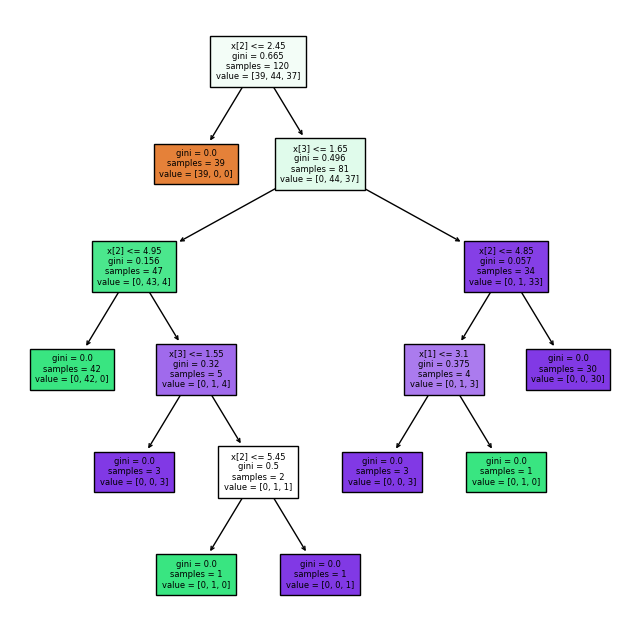

In [58]:
plt.figure(figsize=(8,8))
plot_tree(dt,filled=True,fontsize=6)
plt.show()

In [59]:
rfc = RandomForestClassifier(n_estimators = 10, min_samples_split=2,random_state = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [60]:
y_pred_rfc = rfc.predict(x_test)
rfc_score=accuracy_score(y_test, y_pred_rfc)
print(f"RandomForest accuracy: {rfc_score:.4f}")
confusion_matrix(y_test, y_pred_rfc)

RandomForest accuracy: 0.9667


array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

* All the models Random Forest Classifier, Logisitc Regression and Decision Tree Classifier are performing equally well for the IRIS dataset
* I choose Decision Tree Classifier to be the model for classifying the IRIS. 

**The parameters set for the decision tree classifier are:**
* criterion = 'gini'
* splitter='best'
* random_state = 100
